# Stochastic Models:  Probability Overview

### Goals for Today
- Define random variable, probability distributions, cumulative distributions
- Generate a probability distribution from data

### Pre-Lecture Activities

- [Course notes](https://ubcmath.github.io/MATH360/stochastic/distributions/variables.html) on Probability Distributions including the subsections on Variables and Densities, Normal Distribution, Uniform Distribution, Exponential Distribution, and Gamma Distribution.
- [Course notes](https://ubcmath.github.io/MATH360/stochastic/sampling.html) on Random Sampling.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("packages imported")

packages imported


### Uniform Distribution

1. Plot a uniform distribution on the interval $[1,6]$.
2. Use `np.random.uniform(a,b,n)` to randomly sample from a uniform distribtion on $[1,4]$ with $n=1000$ points and plot the results.  Is it a probability distribution? Why or why not?  If it is not, what would you need to do to turn it in to a probability distribution?

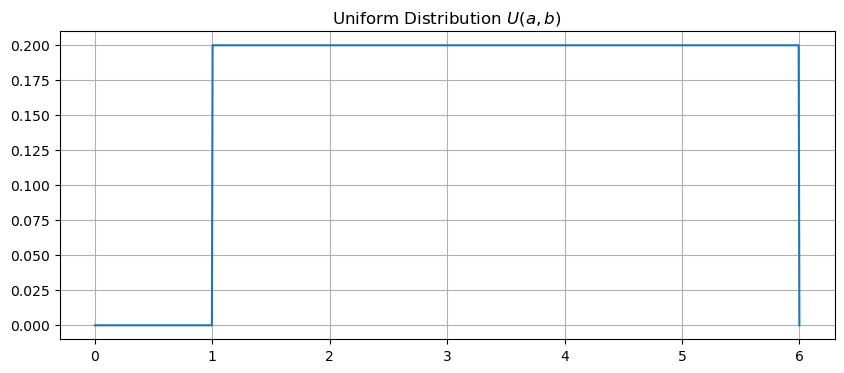

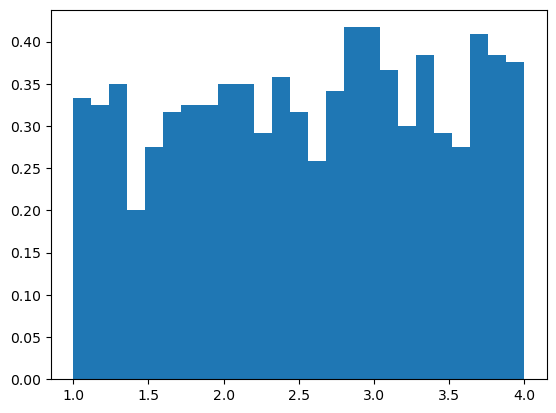

In [2]:
plt.figure(figsize=(10,4))
x = np.linspace(0,6,1000)
uniform = lambda x,a,b: 1/(b-a)*(np.heaviside(x-a,1) - np.heaviside(x-b,1))
y = uniform(x, 1,6)

plt.plot(x,y)
plt.title('Uniform Distribution $U(a,b)$')
plt.grid(True)
plt.show()

s = np.random.uniform(1,4,1000)
count, bins, ignored = plt.hist(s, 25, density=True)
plt.show()


### Normal Distribution

1. Plot a normal distribution with $\mu = 0$ and $\sigma = 1$.
2. Use `np.random.normal(mean,standard deviation,n)` to randomly sample $n$ points from a normal distribtion with zero mean, variance of one, and $n=1000$. Plot the results.  Is it a probability distribution? Why or why not?  If it is not, what would you need to do to turn it in to a probability distribution?

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_15001/2831689922.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Normal Distribution $N(\mu,\sigma^2)$ for $\sigma=1$')


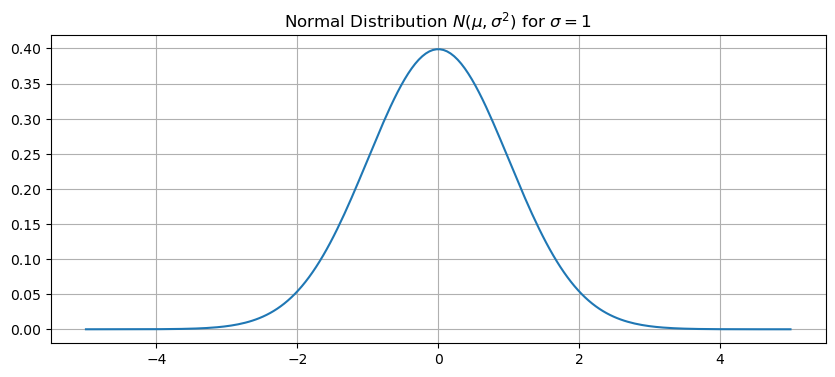

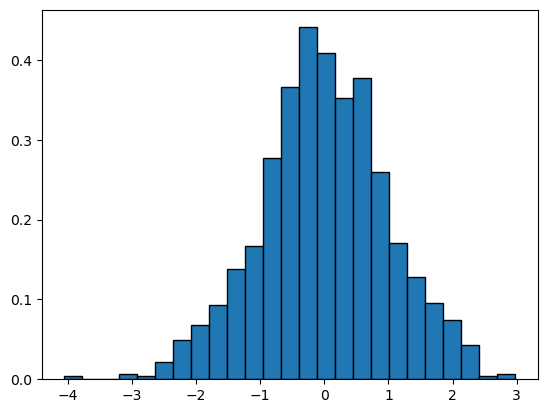

In [3]:
normal = lambda x,mu,sigma: 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*sigma**2))
x = np.linspace(-5,5,200)

plt.figure(figsize=(10,4))
y = normal(x, 0,1)
plt.plot(x,y)
plt.title('Normal Distribution $N(\mu,\sigma^2)$ for $\sigma=1$')
plt.grid(True)
plt.show()

#
n = np.random.normal(0, 1, 1000)
count, bins, ignored = plt.hist(n, 25, density=True, edgecolor='black')
plt.show()

#### Cumulative Distribution
Using the sample from the normal distirbution above, calculate the cumulative distribution function and plot the curve. Then calculate the probability of $-1.5 \leq x \leq 2$.

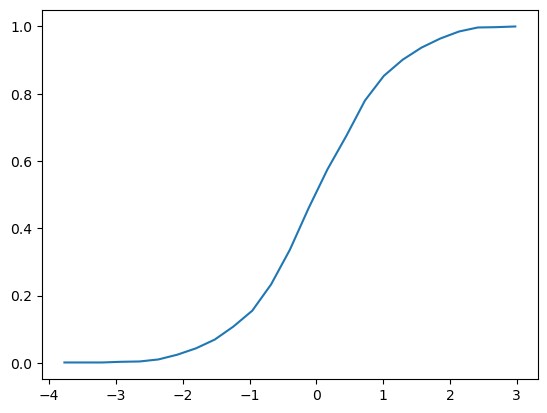

In [8]:
counts, bins = np.histogram(n, bins=25) 
prob = counts/sum(counts) # probability for each bin (observation / total)
cumulative = np.cumsum(prob) # the total sum of all probabilities (should equal 1)

plt.plot(bins[1:], cumulative, linestyle='-')
plt.show()

In [6]:
probability = 0
for bin, count in list(zip(bins, counts)):
    if bin >=-1.5 and bin <= 2:
        prob = count/sum(counts)
        probability += prob
probability

0.877

In [11]:
import scipy.integrate as spi
# mu = 0, sigma = 1 
def f(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

F_of_2, err_1 = spi.quad(f, -np.inf, 2)
F_of_neg_1_5, err_2 = spi.quad(f, -np.inf, -1.5)

prob = F_of_2 - F_of_neg_1_5
prob

0.9104426667829628

### Exponential Distribution

1. Plot an exponential distribution with means of 1, 5, and 10.
2. Use `np.random.exponential(scale=mean,size=n)` to randomly sample $n=1000$ points from an exponential distribtion with mean of $0.5$. Plot the results.  Then turn the results into a probability distribution.

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_14605/239869494.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Exponential Distribution $Exp(\lambda)$')
/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_14605/239869494.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.legend(['$\lambda=1$','$\lambda=5$','$\lambda=10$'])
/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_14605/239869494.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.legend(['$\lambda=1$','$\lambda=5$','$\lambda=10$'])
/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipy

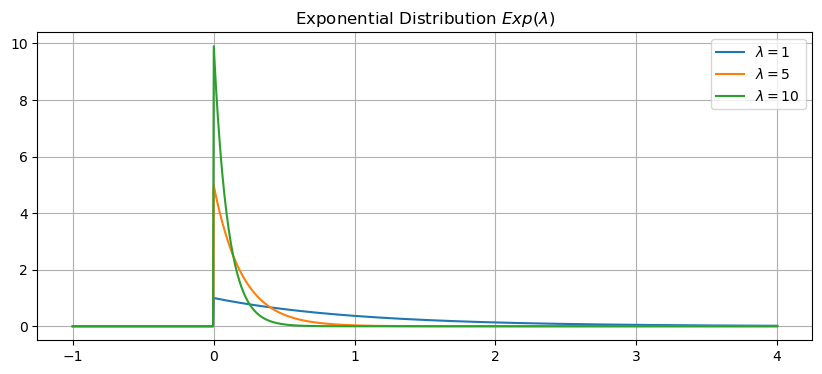

In [32]:
plt.figure(figsize=(10,4))
x = np.linspace(-1,4,1000)
exponential = lambda x,lam: lam*np.exp(-lam*x)*np.heaviside(x,1)
for lam in [1,5,10]:
    y = exponential(x,lam)
    plt.plot(x,y)
plt.title('Exponential Distribution $Exp(\lambda)$')
plt.legend(['$\lambda=1$','$\lambda=5$','$\lambda=10$'])
plt.grid(True)
plt.show()

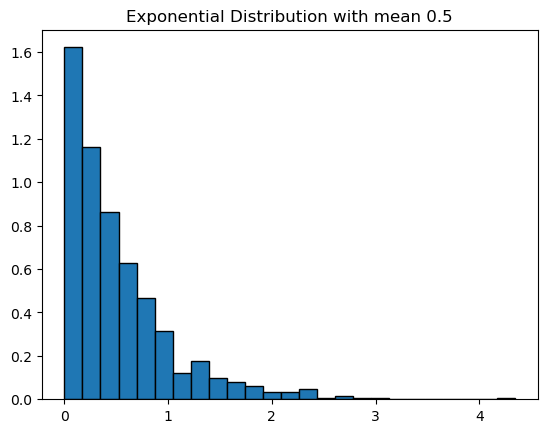

In [16]:
expon_random = np.random.exponential(scale=0.5, size=1000)
count, bins, ignored = plt.hist(expon_random, 25, density=True, edgecolor='black')
plt.title(f'Exponential Distribution with mean {0.5}')
plt.show()

### Gamma Distribution

1. Plot the gamma distribution for $(\alpha,\beta) = (2,1),(3,2),(7,4)$.
2. Use `np.random.gamma(shape=mean,scale=variance,n)` to randomly sample $n=1000$ points from the gamma distribtion with mean of $2$ and variance of $2$. Plot the results.  Then turn the results into a probability distribution.

<>:12: SyntaxWarning: invalid escape sequence '\G'
<>:12: SyntaxWarning: invalid escape sequence '\G'
/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_15001/4065510334.py:12: SyntaxWarning: invalid escape sequence '\G'
  plt.title('Gamma Distribution $\Gamma(\\alpha, \\beta)$')


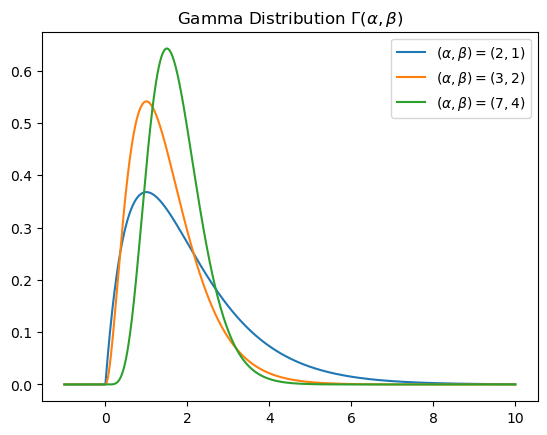

In [23]:
import scipy.special as sps

gamma = lambda x,alpha,beta: beta**alpha/sps.gamma(alpha)*x**(alpha - 1)*np.exp(-beta*x)*np.heaviside(x,1)
pairs = [(2,1), (3,2), (7,4)]

x = np.linspace(-1,10,1000)

for alpha, beta in pairs:
    y = gamma(x, alpha, beta)
    plt.plot(x,y)
    plt.legend([f'$(\\alpha, \\beta)=({a},{b})$' for a,b in pairs])
    plt.title('Gamma Distribution $\Gamma(\\alpha, \\beta)$')

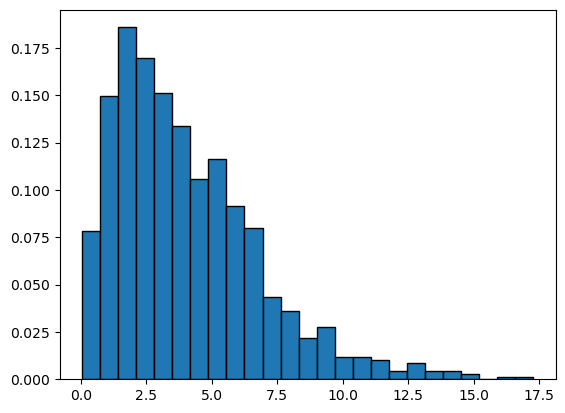

In [24]:
nums = np.random.gamma(2, 2, 1000)
hist = plt.hist(nums, 25, density=True, edgecolor='black')
plt.show()